In [1]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.datasets import cifar10
%matplotlib inline

In [2]:
#import dataset and split into train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

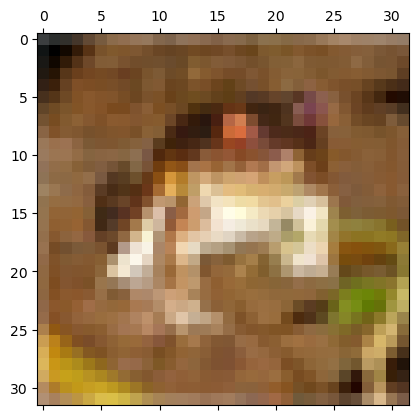

In [3]:
plt.matshow(x_train[0])

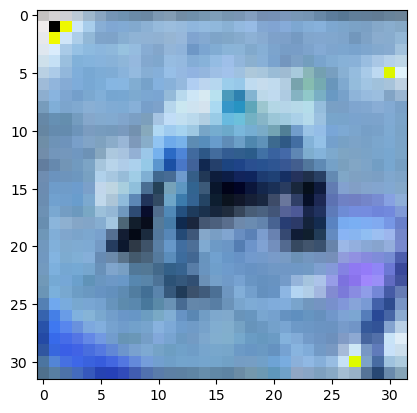

In [4]:
plt.imshow(-x_train[0], cmap="gray")

In [5]:
x_train = x_train / 255
x_test = x_test / 255

In [6]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(32, 32,3)),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer="sgd",
loss="sparse_categorical_crossentropy",
metrics=['accuracy'])

In [8]:
history=model.fit(x_train,
y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8967 - accuracy: 0.3210 - val_loss: 1.7585 - val_accuracy: 0.3892
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7211 - accuracy: 0.3943 - val_loss: 1.7439 - val_accuracy: 0.3872
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6465 - accuracy: 0.4221 - val_loss: 1.6394 - val_accuracy: 0.4161
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5981 - accuracy: 0.4401 - val_loss: 1.6195 - val_accuracy: 0.4244
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5634 - accuracy: 0.4504 - val_loss: 1.5699 - val_accuracy: 0.4445
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5296 - accuracy: 0.4625 - val_loss: 1.5935 - val_accuracy: 0.4365
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5036 - accuracy: 0.4711 - val_loss: 1.5818 - val_accuracy

In [9]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.5777 - accuracy: 0.4485
Loss=1.578
Accuracy=0.449


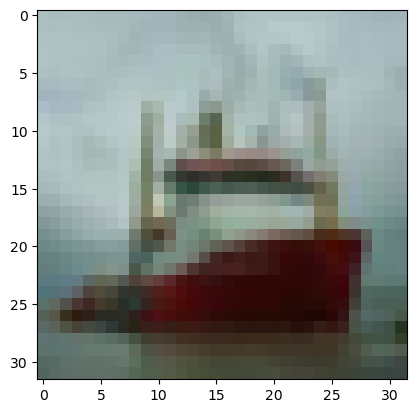

In [10]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [11]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [13]:
predicted_val = model.predict(x_test)
print(predicted_val[n])
maximum = -1
index = -1
for i in (0,9):
 if maximum<predicted_val[n][i]:
     maximum = predicted_val[n][i]
     index = i
 
print(index)

[0.05029113 0.03283401 0.02845512 0.05053964 0.05263035 0.01234562
 0.0392714  0.00795811 0.664237   0.0614376 ]
9


In [14]:
x_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

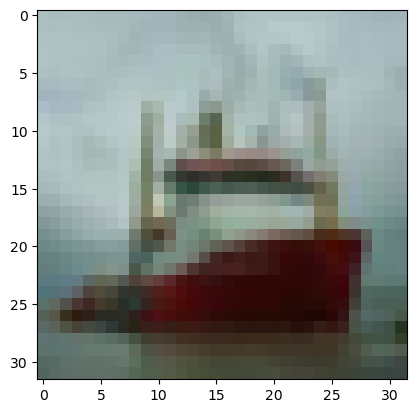

[0.05029113 0.03283401 0.02845512 0.05053964 0.05263035 0.01234562
 0.0392714  0.00795811 0.664237   0.0614376 ]


In [15]:
plt.imshow(x_test[n])
plt.show()
print(predicted_val[n])

In [16]:
if index == 0:
 print("airplane")
if index == 1:
 print("automobile")
if index == 2:
 print("bird")
if index == 3:
 print("cat")
if index == 4:
 print("deer")
if index == 5:
 print("dog")
if index == 6:
 print("frog")
if index == 7:
 print("horse")
if index == 8:
 print("ship")
if index == 9:
 print("truck")

truck


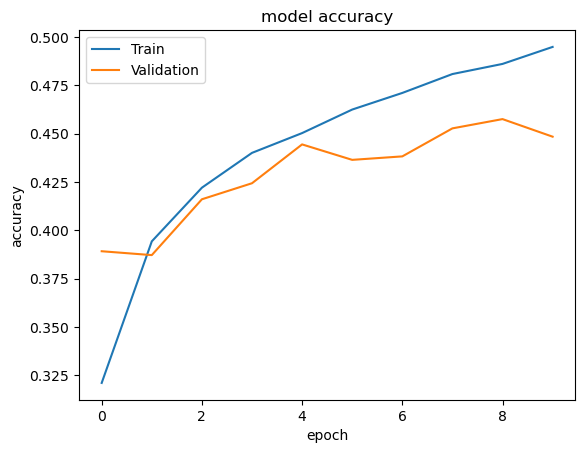

In [17]:
# history.history()
history.history.keys()
# dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()